In [5]:
import pandas as pd
from pandas.plotting import table
import requests
import json
from config import key, bkey
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cbook, ticker, units
import datetime
import functools
import re

## US Census Data API

In [8]:
census = pd.read_html('https://api.census.gov/data.html')[0]

In [9]:
list(census["Title"])

['1986 County Business Patterns: Business Patterns',
 '1987 County Business Patterns: Business Patterns',
 '1988 County Business Patterns: Business Patterns',
 '1989 County Business Patterns: Business Patterns',
 '1990 County Business Patterns: Business Patterns',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: County Estimates by 5 Year Age Groups, Race by Sex, and Hispanic Origin',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: United States Civilian Population Estimates by Age and Sex',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: United States Resident plus Armed Forces Overseas Population Estimates by Age and Sex',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: United States Resident Population Estimates by Age and Sex',
 '1991 County Business Patterns: Business Patterns',
 '1992 County Business Patterns: Business Patterns',
 '1993 County Business Patterns: Business Patterns',
 '1994 County Business Patterns: Busines

### International Trade

In [10]:
trade_census = census[census["Title"].str.contains("International Trade")]
pd.set_option('display.max_colwidth', None)
trade_census

,Title,Description,Vintage,Dataset Name,Dataset Type,Geography List,Variable List,Group List,Examples,Developer Documentation,API Base URL
306,2014 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2014,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2014/intltrade/imp_exp
352,2015 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2015,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2015/intltrade/imp_exp
378,2016 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2016,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2016/intltrade/imp_exp
452,2017 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2017,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2017/intltrade/imp_exp
483,2018 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2018,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2018/intltrade/imp_exp
528,Time Series Economic Indicators Time Series -: U.S. International Trade in Goods and Services,"The U.S. Census Bureau.s economic indicator surveys provide monthly and quarterly data that are timely, reliable, and offer comprehensive measures of the U.S. economy. These surveys produce a variety of statistics covering construction, housing, international trade, retail trade, wholesale trade, services and manufacturing. The survey data provide measures of 

# Import

### Time Series International Trade: Monthly U.S. Imports by Port and Harmonized System (HS) Code<br>
The Port HS endpoint in the Census data API also provides value, shipping weight, and method of transportation totals at the port level for all U.S. trading partners. The Census data API will help users research new markets for their products, establish pricing structures for potential export markets, and conduct economic planning.

#### Variables

In [11]:
portVar = pd.read_html('https://api.census.gov/data/timeseries/intltrade/imports/porths/variables.html')[0]
portVar

,Name,Label,Concept,Required,Attributes,Limit,Predicate Type,Group,Unnamed: 8
0,AIR_VAL_MO,15-digit Air Value,Measures,not required,NaN,0,int,NaN,NaN
1,AIR_VAL_YR,15-digit Year-to-Date Air Value,Measures,not required,NaN,0,int,NaN,NaN
2,AIR_WGT_MO,15-digit Air Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
3,AIR_WGT_YR,15-digit Year-to-Date Air Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
4,CNT_VAL_MO,15-digit Containerized Vessel Value,Measures,not required,NaN,0,int,NaN,NaN
5,CNT_VAL_YR,15-digit Year-to-Date Containerized Vessel Value,Measures,not required,NaN,0,int,NaN,NaN
6,CNT_WGT_MO,15-digit Containerized Vessel Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
7,CNT_WGT_YR,15-digit Year-to-Date Containerized Vessel Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
8,COMM_LVL,4-character aggregation levels for commodity code. HS2=2-digit HS totals. HS4=4-digit HS totals. HS6=6-digit HS totals.,Measures,not required,NaN,0,string,NaN,NaN
9,CTY_CODE,4-character Country Code,Measures,default displayed,NaN,0,string,NaN,NaN


In [12]:
portDict = dict(zip(portVar["Name"], portVar["Label"].str.replace('15-digit ', '')))

## Port and Container Count

In [13]:
portURL = 'https://api.census.gov/data/timeseries/intltrade/imports/porths?get='
portURLreq = requests.get(f"{portURL}PORT,PORT_NAME,CNT_WGT_MO&time=from+2019+to+2021&key={key}")
print(portURLreq.url)

https://api.census.gov/data/timeseries/intltrade/imports/porths?get=PORT,PORT_NAME,CNT_WGT_MO&time=from+2019+to+2021&key=c140aee8a215a9f809ef67c3c758614e79362587


In [14]:
portData = portURLreq.json()
portDF = pd.DataFrame(portData, columns=portData[0]).drop([0]).rename(columns=portDict)
pd.set_option('display.max_colwidth', None)
portDF

,4-character Port Code,150-character Port Name,Containerized Vessel Shipping Weight,ISO-8601 Date/Time value
1,-,TOTAL FOR ALL PORTS,15840254477,2019-01
2,-,TOTAL FOR ALL PORTS,13329969180,2019-02
3,-,TOTAL FOR ALL PORTS,14054279566,2019-03
4,-,TOTAL FOR ALL PORTS,14721360090,2019-04
5,-,TOTAL FOR ALL PORTS,15441730719,2019-05
...,...,...,...,...
9030,2401,"YSLETA, TX",0,2020-10
9031,2401,"YSLETA, TX",0,2020-11
9032,2401,"YSLETA, TX",0,2020-12
9033,2401,"YSLETA, TX",0,2021-01


In [15]:
port = portDF[~portDF['150-character Port Name'].str.contains("TOTAL")].drop(columns=['4-character Port Code']).rename(columns={'150-character Port Name':'Port','ISO-8601 Date/Time value':'Date'})
#port['Date'] = pd.to_datetime(port['Date'])
port.head()

,Port,Containerized Vessel Shipping Weight,Date
27,"PORTLAND, ME",8582227,2019-01
28,"PORTLAND, ME",14823829,2019-02
29,"PORTLAND, ME",12000667,2019-03
30,"PORTLAND, ME",19453602,2019-04
31,"PORTLAND, ME",14481568,2019-05


In [16]:
port.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9008 entries, 27 to 9034
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Port                                  9008 non-null   object
 1   Containerized Vessel Shipping Weight  9008 non-null   object
 2   Date                                  9008 non-null   object
dtypes: object(3)
memory usage: 281.5+ KB


In [17]:
portCOL = port.columns.drop(['Port',"Date"])
port[portCOL] = port[portCOL].apply(pd.to_numeric, errors='coerce')
port.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9008 entries, 27 to 9034
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Port                                  9008 non-null   object
 1   Containerized Vessel Shipping Weight  9008 non-null   int64 
 2   Date                                  9008 non-null   object
dtypes: int64(1), object(2)
memory usage: 281.5+ KB


In [18]:
port.head()

,Port,Containerized Vessel Shipping Weight,Date
27,"PORTLAND, ME",8582227,2019-01
28,"PORTLAND, ME",14823829,2019-02
29,"PORTLAND, ME",12000667,2019-03
30,"PORTLAND, ME",19453602,2019-04
31,"PORTLAND, ME",14481568,2019-05


Consolidate Port by State

In [19]:
list(port['Port'].unique())

['PORTLAND, ME',
 'BANGOR, ME',
 'EASTPORT, ME',
 'JACKMAN, ME',
 'VANCEBORO, ME',
 'HOULTON, ME',
 'FORT FAIRFIELD, ME',
 'VAN BUREN, ME',
 'MADAWASKA, ME',
 'FORT KENT, ME',
 'BATH, ME',
 'BAR HARBOR, ME',
 'CALAIS, ME',
 'LIMESTONE, ME',
 'ROCKLAND, ME',
 'JONESPORT, ME',
 'BRIDGEWATER, ME',
 'PORTSMOUTH, NH',
 'BELFAST, ME',
 'SEARSPORT, ME',
 'MANCHESTER USER FEE AIRPORT, NH',
 'ST. ALBANS, VT',
 'RICHFORD, VT',
 'BEECHER FALLS, VT',
 'BURLINGTON, VT',
 'DERBY LINE, VT',
 'NORTON, VT',
 'HIGHGATE SPRINGS-ALBURG, VT',
 'BOSTON, MA',
 'SPRINGFIELD, MA',
 'WORCESTER, MA',
 'GLOUCESTER, MA',
 'NEW BEDFORD, MA',
 'PLYMOUTH, MA',
 'FALL RIVER, MA',
 'SALEM, MA',
 'BRIDGEPORT, CT',
 'HARTFORD, CT',
 'NEW HAVEN, CT',
 'NEW LONDON, CT',
 'LAWRENCE, MA',
 'LOGAN AIRPORT, MA',
 'L.G. HANSCOM FIELD, BEDFORD, MA',
 'NEWPORT, RI',
 'PROVIDENCE, RI',
 'OGDENSBURG, NY',
 'MASSENA, NY',
 'ALEXANDRIA BAY, NY',
 'CHAMPLAIN-ROUSES POINT, NY',
 'TROUT RIVER, NY',
 'BUFFALO-NIAGARA FALLS, NY',
 'ROCHES

In [20]:
portST = port.copy()
portST['Port State'] = port['Port'].str[-2:]

In [21]:
portST.head()

,Port,Containerized Vessel Shipping Weight,Date,Port State
27,"PORTLAND, ME",8582227,2019-01,ME
28,"PORTLAND, ME",14823829,2019-02,ME
29,"PORTLAND, ME",12000667,2019-03,ME
30,"PORTLAND, ME",19453602,2019-04,ME
31,"PORTLAND, ME",14481568,2019-05,ME


In [22]:
portST = portST.groupby(['Date','Port State']).sum().reset_index().rename(columns={'Containerized Vessel Shipping Weight':'Weight'})
portST

,Date,Port State,Weight
0,2019-01,AK,3377105
1,2019-01,AL,116945198
2,2019-01,AR,0
3,2019-01,AZ,0
4,2019-01,CA,5217244404
...,...,...,...
1399,2021-02,VI,118988
1400,2021-02,VT,0
1401,2021-02,WA,561031653
1402,2021-02,WI,36602


In [23]:
cleanPort = portST[(portST.Weight != 0)]
cleanPort

,Date,Port State,Weight
0,2019-01,AK,3377105
1,2019-01,AL,116945198
4,2019-01,CA,5217244404
6,2019-01,CT,10767755
7,2019-01,DC,637104
...,...,...,...
1395,2021-02,TX,952521945
1398,2021-02,VA,757191592
1399,2021-02,VI,118988
1401,2021-02,WA,561031653


### Estimate TEU Count (Twenty Equivalent Count) = 1 Twenty Foot Container

Estimate Container count by dividing Weight(kg) to tons. <br>
1 TEU = 24,000 kg max load weight

In [24]:
portTEU = cleanPort.copy()

In [25]:
portTEU['TEU'] = portTEU['Weight'].floordiv(24000)

In [26]:
portTEU

,Date,Port State,Weight,TEU
0,2019-01,AK,3377105,140
1,2019-01,AL,116945198,4872
4,2019-01,CA,5217244404,217385
6,2019-01,CT,10767755,448
7,2019-01,DC,637104,26
...,...,...,...,...
1395,2021-02,TX,952521945,39688
1398,2021-02,VA,757191592,31549
1399,2021-02,VI,118988,4
1401,2021-02,WA,561031653,23376


### Heatmap - Total Container Count by State & Date

In [27]:
portTEUdf = portTEU.pivot(index="Date", columns="Port State", values="TEU")
portTEUdf.describe().astype(int)

Port State,AK,AL,CA,CT,DC,DE,FL,GA,HI,IL,...,OR,PA,PR,RI,SC,TX,VA,VI,WA,WI
count,26,26,26,20,26,26,26,26,26,26,...,26,26,26,25,26,26,26,26,26,26
mean,126,5779,197073,423,17,6606,36419,52706,3273,478,...,397,14950,13581,428,28563,44335,32613,39,29792,337
std,53,1067,23814,765,9,748,2880,5951,1630,547,...,425,1554,2555,609,2381,3799,2691,29,2995,514
min,31,4267,145034,0,4,5674,32018,42652,465,40,...,2,11679,8886,0,22731,37289,26806,2,23077,1
25%,99,5017,181594,2,9,6015,34416,48152,2648,104,...,7,13916,11923,2,27113,41729,31077,10,28073,6
50%,120,5409,197353,55,16,6449,35110,52233,2926,220,...,325,14545,14238,61,28690,44817,32804,35,29949,31
75%,153,6334,217628,225,26,6940,38160,56712,4699,611,...,690,16443,15280,850,29691,46657,34041,62,31538,673
max,272,7888,230125,2157,39,8356,45138,64098,6393,2031,...,1354,17437,18066,2100,33762,51230,37582,115,35228,1673


In [28]:
import seaborn as sns

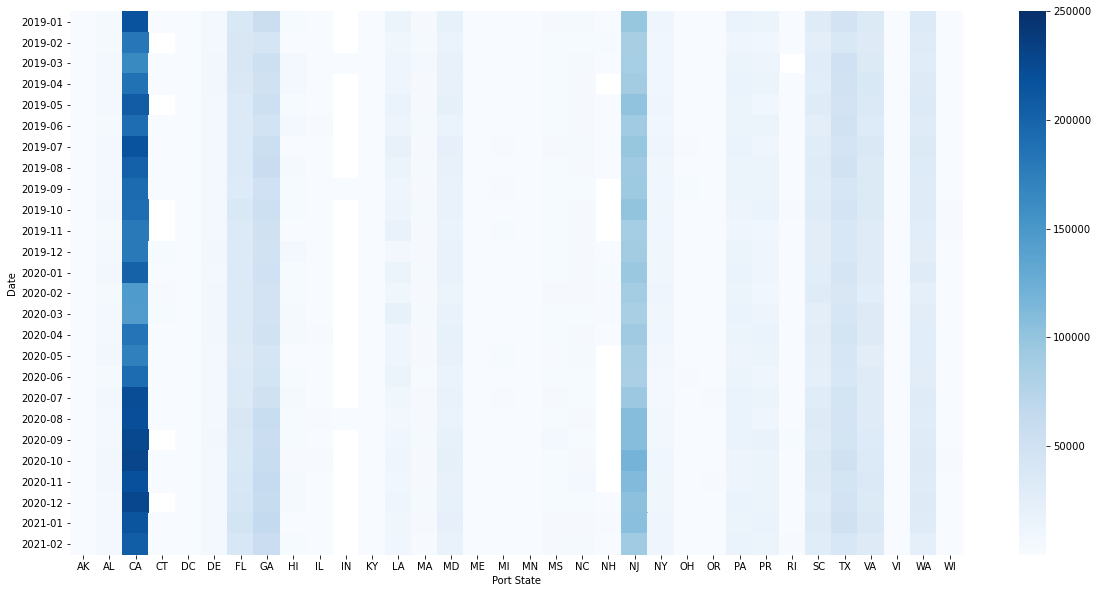

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(portTEUdf,cmap="Blues", vmin=100, vmax=250000)
plt.show()

### Time Series International Trade: Monthly U.S. Imports by End-use Code <br>
The Census data API provides access to the most comprehensive set of data on current month and cumulative year-to-date imports using the End-use classification system. The End-use endpoint in the Census data API also provides value, shipping weight, and method of transportation totals at the district level for all U.S. trading partners.

In [30]:
useVar = pd.read_html('https://api.census.gov/data/timeseries/intltrade/imports/enduse/variables.html')[0]
useVar

,Name,Label,Concept,Required,Attributes,Limit,Predicate Type,Group,Unnamed: 8
0,AIR_CHA_MO,15-digit Air Charges,Measures,not required,NaN,0,int,NaN,NaN
1,AIR_CHA_YR,15-digit Year-to-date Air Charges,Measures,not required,NaN,0,int,NaN,NaN
2,AIR_VAL_MO,15-digit Air Value,Measures,not required,NaN,0,int,NaN,NaN
3,AIR_VAL_YR,15-digit Year-to-Date Air Value,Measures,not required,NaN,0,int,NaN,NaN
4,AIR_WGT_MO,15-digit Air Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
5,AIR_WGT_YR,15-digit Year-to-Date Air Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
6,CAL_DUT_MO,"15-digit Imports for Consumption, Calculated Duty",Measures,not required,NaN,0,int,NaN,NaN
7,CAL_DUT_YR,"15-digit Year-to-Date Imports for Consumption, Calculated Duty",Measures,not required,NaN,0,int,NaN,NaN
8,CC_MO,15-digit Card Count,Measures,not required,NaN,0,int,NaN,NaN
9,CC_YR,15-digit Year-to-Date Card Count,Measures,not required,NaN,0,int,NaN,NaN


In [31]:
useDict = dict(zip(useVar["Name"], useVar["Label"].str.replace('15-digit ', '')))

In [35]:
useURL = 'https://api.census.gov/data/timeseries/intltrade/imports/enduse?get='
useURLreq = requests.get(f"{useURL}I_ENDUSE,I_ENDUSE_LDESC,I_ENDUSE_SDESC,DISTRICT,DIST_NAME,CNT_WGT_MO,CON_VAL_MO&time=from+2019+to+2021&key={key}")
print(useURLreq.url)

https://api.census.gov/data/timeseries/intltrade/imports/enduse?get=I_ENDUSE,I_ENDUSE_LDESC,I_ENDUSE_SDESC,DISTRICT,DIST_NAME,CNT_WGT_MO,CON_VAL_MO&time=from+2019+to+2021&key=c140aee8a215a9f809ef67c3c758614e79362587


In [36]:
useData = useURLreq.json()
useDF = pd.DataFrame(useData, columns=useData[0]).drop([0]).rename(columns=useDict)
pd.set_option('display.max_colwidth', None)
useDF

,1- or 5-character Import ENDUSE Code,100-character Import ENDUSE Long Description,100-character Import ENDUSE Short Description,2-character District Code,50-character District name,Containerized Vessel Shipping Weight,"Imports for Consumption, Total Value",ISO-8601 Date/Time value
1,00110,DAIRY PRODUCTS AND EGGS,DAIRY PRODUCTS AND EGGS,-,TOTAL FOR ALL DISTRICTS,27855468,154007917,2019-01
2,0,"FOODS, FEEDS, AND BEVERAGES","FOODS, FEEDS, AND BEVERAGES",-,TOTAL FOR ALL DISTRICTS,3210564497,12644009005,2019-01
3,00000,GREEN COFFEE,GREEN COFFEE,-,TOTAL FOR ALL DISTRICTS,133696955,389845724,2019-01
4,00010,COCOA BEANS,COCOA BEANS,-,TOTAL FOR ALL DISTRICTS,30900280,108660535,2019-01
5,00020,CANE AND BEET SUGAR,CANE AND BEET SUGAR,-,TOTAL FOR ALL DISTRICTS,41121466,146421769,2019-01
...,...,...,...,...,...,...,...,...
147225,50040,"OTHER (MOVIES, MISCELLANEOUS IMPORTS, AND SPECIAL TRANSACTIONS)","OTHER (MOVIES, MISCELLANEOUS IMPORTS, AND SPECIAL",49,"SAN JUAN, PR",435,40253,2021-02
147226,50040,"OTHER (MOVIES, MISCELLANEOUS IMPORTS, AND SPECIAL TRANSACTIONS)","OTHER (MOVIES, MISCELLANEOUS IMPORTS, AND SPECIAL",52,"MIAMI, FL",141992,7430816,2021-02
147227,50040,"OTHER (MOVIES, MISCELLANEOUS IMPORTS, AND SPECIAL TRANSACTIONS)","OTHER (MOVIES, MISCELLANEOUS IMPORTS, AND SPECIAL",53,"HOUSTON-GALVESTON, TX",744207,9773169,2021-02
147228,50040,"OTHER (MOVIES, MISCELLANEOUS IMPORTS, AND SPECIAL TRANSACTIONS)","OTHER (MOVIES, MISCELLANEOUS IMPORTS, AND SPECIAL",54,"WASHINGTON, DC",0,3694705,2021-02


In [37]:
useDF = useDF.rename(columns={'1- or 5-character Import ENDUSE Code':'code'})

In [38]:
enduse = useDF[(useDF.code =='0')|(useDF.code =='1')|(useDF.code =='2')|(useDF.code =='3')|(useDF.code =='4')|(useDF.code =='5')]
enduse

,code,100-character Import ENDUSE Long Description,100-character Import ENDUSE Short Description,2-character District Code,50-character District name,Containerized Vessel Shipping Weight,"Imports for Consumption, Total Value",ISO-8601 Date/Time value
2,0,"FOODS, FEEDS, AND BEVERAGES","FOODS, FEEDS, AND BEVERAGES",-,TOTAL FOR ALL DISTRICTS,3210564497,12644009005,2019-01
19,1,INDUSTRIAL SUPPLIES AND MATERIALS,INDUSTRIAL SUPPLIES AND MATERIALS,-,TOTAL FOR ALL DISTRICTS,5872526057,44950507635,2019-01
71,2,"CAPITAL GOODS, EXCEPT AUTOMOTIVE","CAPITAL GOODS, EXCEPT AUTOMOTIVE",-,TOTAL FOR ALL DISTRICTS,1736879397,54331936824,2019-01
104,3,"AUTOMOTIVE VEHICLES, PARTS, AND ENGINES","AUTOMOTIVE VEHICLES, PARTS, AND ENGINES",-,TOTAL FOR ALL DISTRICTS,959144090,29685606011,2019-01
112,4,CONSUMER GOODS,CONSUMER GOODS,-,TOTAL FOR ALL DISTRICTS,4010812435,56358827870,2019-01
...,...,...,...,...,...,...,...,...
147072,5,OTHER GOODS,OTHER GOODS,53,"HOUSTON-GALVESTON, TX",3923814,132737007,2021-02
147073,5,OTHER GOODS,OTHER GOODS,54,"WASHINGTON, DC",0,20210129,2021-02
147074,5,OTHER GOODS,OTHER GOODS,55,"DALLAS-FORT WORTH, TX",110079,208405142,2021-02
147075,5,OTHER GOODS,OTHER GOODS,60,VESSELS UNDER OWN POWER,0,53736,2021-02


### Total Consumption by Product & Date

In [39]:
enduseTOTAL = enduse[enduse['50-character District name'].str.contains("TOTAL")].drop(columns=['code','100-character Import ENDUSE Long Description','2-character District Code','Containerized Vessel Shipping Weight']).rename(columns={'100-character Import ENDUSE Short Description':'Product', '50-character District name': 'District', 'ISO-8601 Date/Time value':'Date','Imports for Consumption, Total Value':'Consumption Value'})
enduseTOTAL = enduseTOTAL.drop(columns='District')
enduseTOTAL

,Product,Consumption Value,Date
2,"FOODS, FEEDS, AND BEVERAGES",12644009005,2019-01
19,INDUSTRIAL SUPPLIES AND MATERIALS,44950507635,2019-01
71,"CAPITAL GOODS, EXCEPT AUTOMOTIVE",54331936824,2019-01
104,"AUTOMOTIVE VEHICLES, PARTS, AND ENGINES",29685606011,2019-01
112,CONSUMER GOODS,56358827870,2019-01
...,...,...,...
141779,INDUSTRIAL SUPPLIES AND MATERIALS,41482680307,2021-02
141831,"CAPITAL GOODS, EXCEPT AUTOMOTIVE",51437442247,2021-02
141864,"AUTOMOTIVE VEHICLES, PARTS, AND ENGINES",26328406660,2021-02
141872,CONSUMER GOODS,53485847010,2021-02


In [40]:
useTCOL = enduseTOTAL.columns.drop(['Product',"Date"])
enduseTOTAL[useTCOL] = enduseTOTAL[useTCOL].apply(pd.to_numeric, errors='coerce')
enduseTOTAL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 2 to 141903
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Product            156 non-null    object
 1   Consumption Value  156 non-null    int64 
 2   Date               156 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.9+ KB


In [41]:
valuePD = enduseTOTAL.pivot(index="Date", columns='Product', values='Consumption Value')
valuePD

Product,"AUTOMOTIVE VEHICLES, PARTS, AND ENGINES","CAPITAL GOODS, EXCEPT AUTOMOTIVE",CONSUMER GOODS,"FOODS, FEEDS, AND BEVERAGES",INDUSTRIAL SUPPLIES AND MATERIALS,OTHER GOODS
Date,,,,,,
2019-01,29685606011,54331936824,56358827870,12644009005,44950507635,8965165729
2019-02,29158685430,49793775442,48344054105,11072165193,37769028496,8692249924
2019-03,33732910210,57161020388,50246512101,13294785046,44147909110,9718542268
2019-04,31431903601,55664491361,53232710594,13324195211,45536655454,9444819220
2019-05,33464007823,59129342809,55837927149,13374820973,48996953683,10070663660
2019-06,32278897256,57021182865,51560575131,12404315309,42739922548,10230502263
2019-07,31418806173,58926891588,59709090714,12705244373,47132722515,10218649065
2019-08,32469109677,57692763752,58728025609,12196919202,44747759322,9241848523
2019-09,30047678791,55788883962,57880611040,11826211792,40860301414,10492241553


In [63]:
valuePD.describe()

Product,"AUTOMOTIVE VEHICLES, PARTS, AND ENGINES","CAPITAL GOODS, EXCEPT AUTOMOTIVE",CONSUMER GOODS,"FOODS, FEEDS, AND BEVERAGES",INDUSTRIAL SUPPLIES AND MATERIALS,OTHER GOODS
count,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01
mean,2.852813e+10,5.487517e+10,5.440038e+10,1.267919e+10,4.156767e+10,9.343690e+09
std,5.943175e+09,3.869275e+09,6.353276e+09,6.184818e+08,3.374945e+09,1.049304e+09
min,9.559681e+09,4.668228e+10,4.219771e+10,1.107217e+10,3.623128e+10,7.126396e+09
25%,2.847152e+10,5.302939e+10,5.027125e+10,1.238995e+10,3.855380e+10,8.778321e+09
50%,2.991783e+10,5.572669e+10,5.469105e+10,1.271194e+10,4.174549e+10,9.416516e+09
75%,3.205323e+10,5.724438e+10,5.881526e+10,1.317508e+10,4.385652e+10,9.894456e+09
max,3.407224e+10,6.071768e+10,6.625266e+10,1.362786e+10,4.899695e+10,1.194450e+10


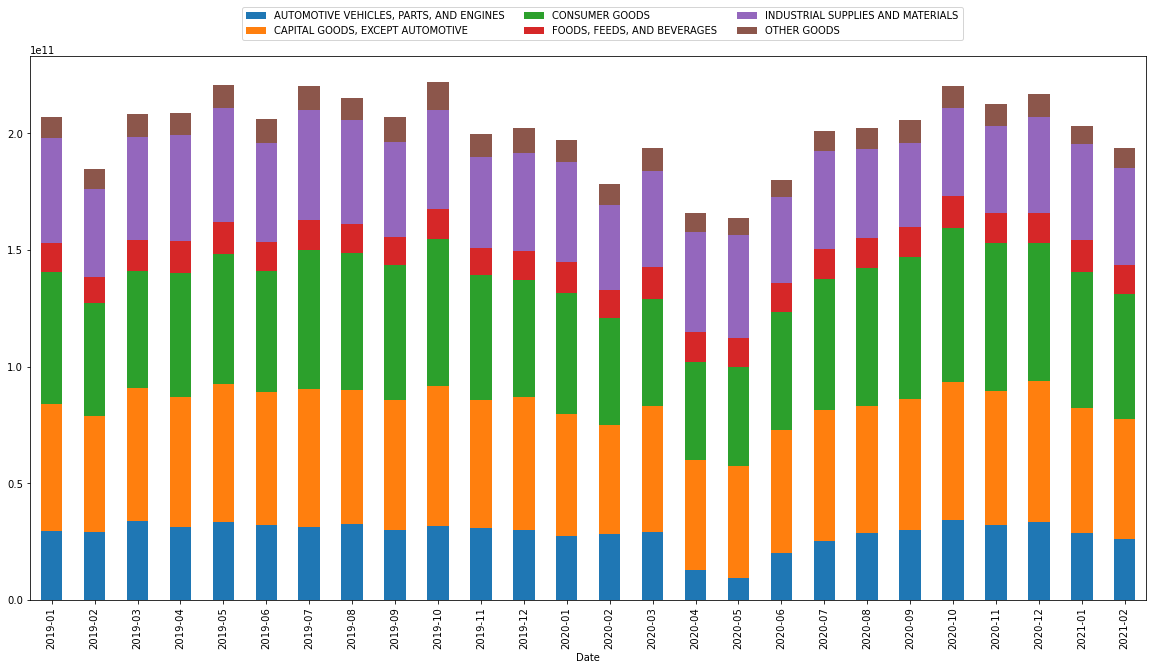

In [62]:
valuePD.plot(kind='bar', stacked=True, figsize=(20,10))
plt.legend(bbox_to_anchor =(0.84,1.1), ncol = 3)
plt.show()

### Time Series International Trade: Monthly U.S. Imports by Port and Harmonized System (HS) Code
The Port HS endpoint in the Census data API also provides value, shipping weight, and method of transportation totals at the port level for all U.S. trading partners.

#### Variable

In [ ]:
port_var = pd.read_html('https://api.census.gov/data/timeseries/intltrade/imports/porths/variables.html')[0]
print(list(port_var['Name']))

In [ ]:
var_dict2 = dict(zip(port_var["Name"], port_var["Label"].str.replace('15-digit ', '')))

#### Data

In [ ]:
url2 = ("https://api.census.gov/data/timeseries/intltrade/imports/porths?get=")

In [ ]:
response2 = requests.get(f"{url2}I_COMMODITY,I_COMMODITY_LDESC,COMM_LVL,CNT_WGT_MO&time=2021&key={key}")
print(response2.url)

In [ ]:
df2 = response2.json()
df2 = pd.DataFrame(df2, columns=df2[0]).drop([0]).rename(columns=var_dict2)
df2.head()

In [ ]:
remove = df2[~df2["150-character Port Name"].str.contains("TOTAL")].drop(columns=['4-character Port Code','4-character Country Code'])
port = remove[~remove["50-character Country Name"].str.contains("TOTAL")].rename(columns={'150-character Port Name':'Port', '50-character District name': 'District', 'ISO-8601 Date/Time value':'Date'})
port.set_index('Port').head()

In [ ]:
import requests
import json
import prettytable

In [ ]:
bls_url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"

In [ ]:
bls_response = requests.get("")